In [3]:
from sklearn import svm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [61]:
def prepare_dataset():
    X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_samples = 100, hypercube = True,
                              class_sep = 0.5, flip_y = 0.1, random_state=35)
    
    blob_x = np.array([
        [1.2, -0.5],
        [1.0, 0.5],
        [1.0, 0.1],
        [1.0, -0.8]
    ])
    blob_y = np.array([0, 0, 0, 0])
    X = np.concatenate((X, blob_x), axis=0)
    Y = np.concatenate((Y, blob_y), axis=0)
    plt.scatter(X[:, 0], X[: ,1], c=Y)
    plt.show()
    return X, Y

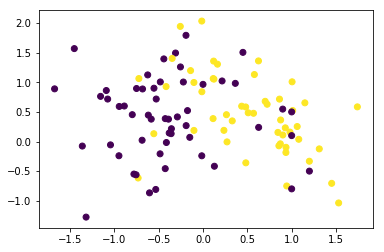

In [67]:
X, Y = prepare_dataset()

In [63]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAF', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def map_color(x):
    if x==0:
        return '#FFAAAA'
    if x==1:
        return '#AAFFAA'
    return '#AAAAFF'

def map_color_bold(x):
    if x==0:
        return '#FF0000'
    if x==1:
        #return '#00FF00'
        return '#0000FF'
    return '#0000FF'

def map_edge_colors(x):
    if x==0:
        return '#D01B1B'
    if x==1:
        return '#51D01B'

In [64]:
def create_clf(X, Y, kernel, C, gamma):
    clf = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=3)
    clf.fit(X, Y)
    w = clf.dual_coef_.dot(clf.support_vectors_)
    margin = 2 / (np.sqrt(np.sum((w ** 2))))
    score = clf.score(X, Y) * 100
    plt.clf()
    plot_decision_boundary(X, Y, clf, kernel, C, gamma)
    return margin, score, clf
    #print("coef_ " + str(clf.coef_))

In [65]:
def plot_decision_boundary(X, Y, clf, kernel, C, gamma, step=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, step),
                        (np.arange(y_min, y_max, step)))
    # decision boundary
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.01, linestyles=['--', '-', '--'], color='red')
    
    # plot colors && points
    grid = np.array(np.c_[XX.ravel(), YY.ravel()])
    Z = clf.predict(grid)
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=cmap_light)
    col = []
    for color in Y:
        col.append(map_color_bold(color))
    plt.scatter(X[:, 0], X[:, 1], c=col,  marker='x', s=30, alpha=1,)
    fig_ame = kernel + "_" + str(C) + "_" + str(gamma)
    plt.savefig('plots/' + fig_ame + '.png')

In [71]:
#X, Y = prepare_dataset()

class result():
    
    def __init__(self, C, gamma, margin, score):
        self.C = C
        self.gamma = gamma
        self.margin = margin
        self.score = score

def experiment():
    result_dict = {"linear": [], "poly": [], "rbf": []}
    for kernel in ['linear', 'poly', 'rbf']:
        for C in [0.001, 0.01, 0.1, 1]:
            for gamma in [0.01, 0.1, 1]:
                margin, score, clf = create_clf(X, Y, kernel=kernel, C=C, gamma=gamma)
                result_dict[kernel].append(result(C, gamma, margin, score))
                plot_decision_boundary(X, Y,  clf, kernel=kernel, C=C, gamma=gamma)
    return result_dict

result_dict = experiment()

    #kernel = 'poly' 
#C = 0.01
#gamma = 0.1
#margin, score, clf = create_clf(X, Y, kernel=kernel, C=C, gamma=gamma)
#print ("margin: " + str(margin) + " score:" + str(score))


In [72]:
# TODO: implement that
def plot_margin_scores(kernel):
    results = result_dict[kernel]
    X = []
    Y = [] 
    margin = []
    scores = []
    for result in results:
        X.append(result.C)
        Y.append(result.gamma)
        margin.append(result.margin)
        scores.append(result.score)

    print (X)
    plt.figure(figsize=(20,20))
    ind = np.arange(len(X))
    width = 0.5
    labels_X = zip(X, Y)
    print(labels_X)
    plt.xlabel('Para (C, gamma)', fontsize=25)
    plt.ylabel('Margines', fontsize=25)
    plt.bar(ind, margin, width)
    plt.xticks(ind, (labels_X), fontsize=14)
    plt.yticks(fontsize=20)
    plt_name = kernel + 'margines.png'
    plt.savefig('plots_finals/' + plt_name)
    
    ###
    print (X)
    plt.figure(figsize=(20,20))
    ind = np.arange(len(X))
    width = 0.5
    labels_X = zip(X, Y)
    print(labels_X)
    plt.xlabel('Para (C, gamma)', fontsize=25)
    plt.ylabel('Score', fontsize=25)
    plt.bar(ind, scores, width)
    plt.xticks(ind, (labels_X), fontsize=14)
    plt.yticks(fontsize=20)
    plt_name = kernel + 'score.png'
    plt.savefig('plots_finals/' + plt_name)
    
    

In [73]:
plot_margin_scores('linear')
plot_margin_scores('rbf')
plot_margin_scores('poly')

[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1]
